<a href="https://colab.research.google.com/github/komalchilke/cpp-programs/blob/main/logisticreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/drive/MyDrive/titanic.csv")
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.isnull().sum()
print('Median of age column: %2f'%(dataset["Age"].median(skipna=True)))

print('Percent of missing records in the  cabin column: %.2f%%'
%((dataset['Cabin'].isnull().sum()/dataset.shape[0])*100))

print('Most common boarding port of embarkation: %s'
%dataset['Embarked'].value_counts().idxmax())

dataset["Age"].fillna(dataset["Age"].median(skipna=True), inplace=True)
dataset.drop('Cabin',axis=1,inplace=True)
dataset.isnull().sum()


Median of age column: 28.000000
Percent of missing records in the  cabin column: 77.10%
Most common boarding port of embarkation: S


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
dataset.drop("PassengerId",axis=1, inplace=True)
dataset.drop("Name",axis=1, inplace=True)
dataset.drop("Ticket",axis=1, inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0,0,1)
dataset.drop("SibSp",axis=1, inplace=True)
dataset.drop("Parch",axis=1, inplace=True)
dataset.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


male      577
female    314
Name: Sex, dtype: int64

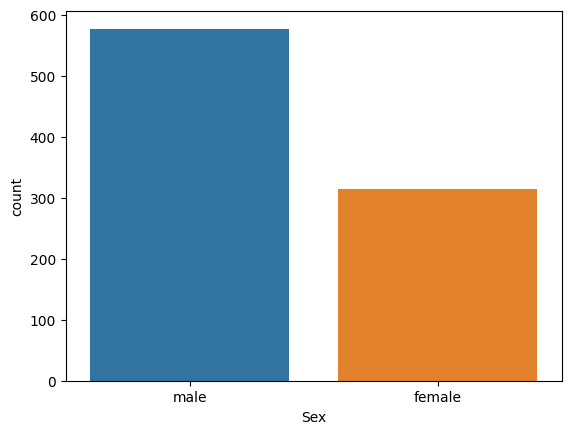

In [ ]:
sns.countplot(data=dataset,x="Sex")
dataset['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


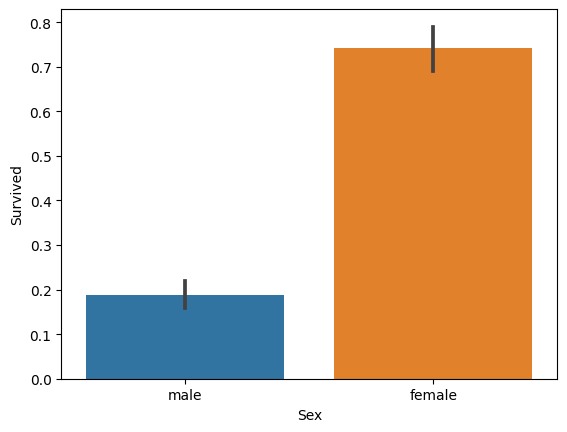

In [ ]:
sns.barplot(x="Sex",y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

3    491
1    216
2    184
Name: Pclass, dtype: int64

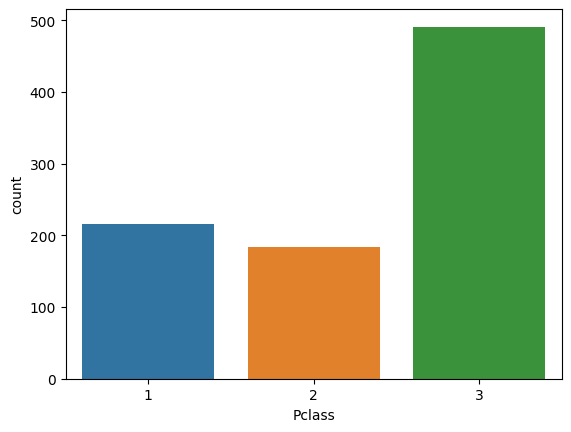

In [ ]:
sns.countplot(x="Pclass",data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


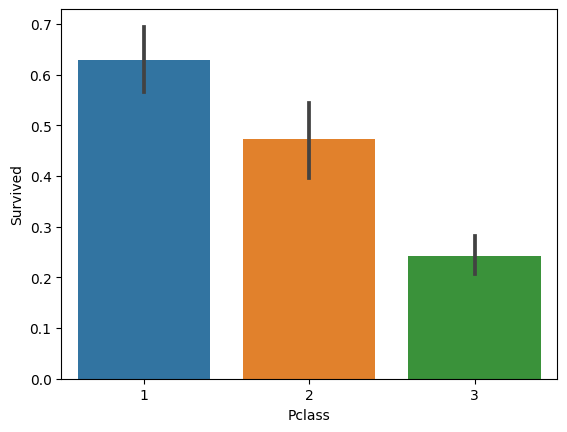

In [ ]:
sns.barplot(x="Pclass",y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

<Axes: xlabel='Survived', ylabel='count'>

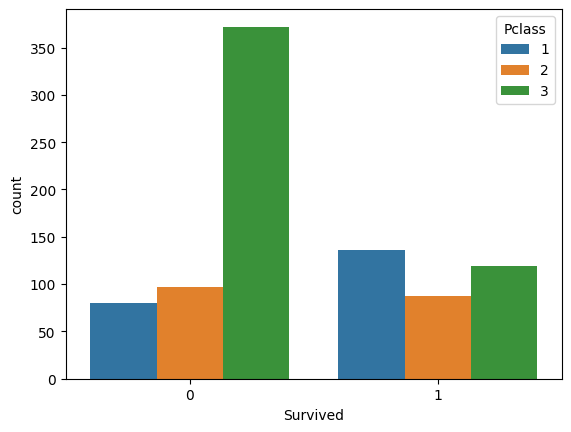

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=dataset)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

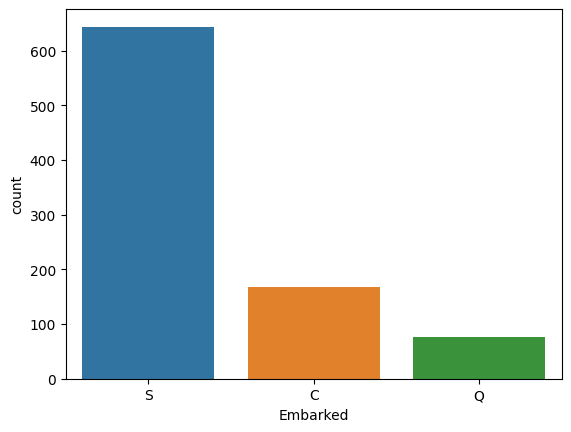

In [ ]:
sns.countplot(x="Embarked",data=dataset)
dataset['Embarked'].value_counts()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


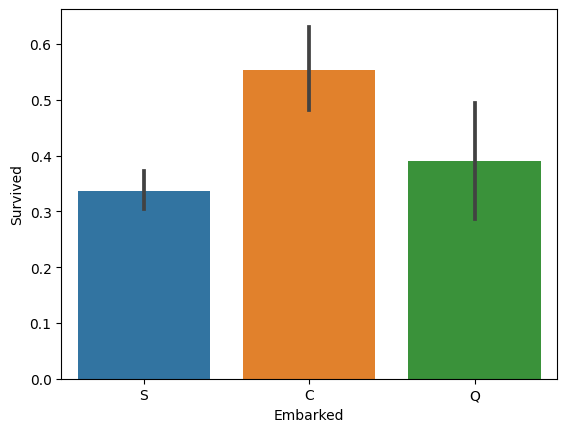

In [ ]:
sns.barplot(x="Embarked",y='Survived',data=dataset)
dataset.groupby('Embarked',as_index=False).Survived.mean()

<Axes: xlabel='Survived', ylabel='count'>

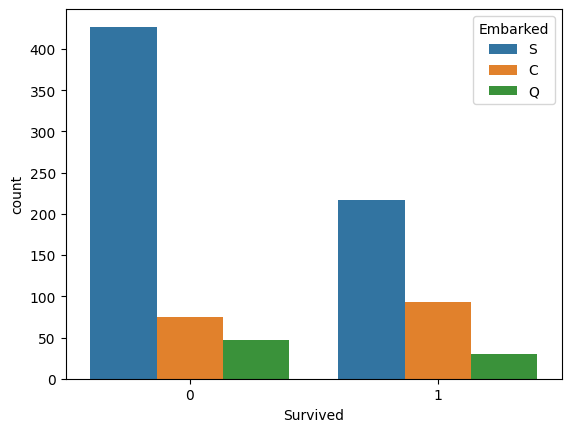

In [ ]:
sns.countplot(x="Survived",hue="Embarked",data=dataset)

1    537
0    354
Name: TravelAlone, dtype: int64

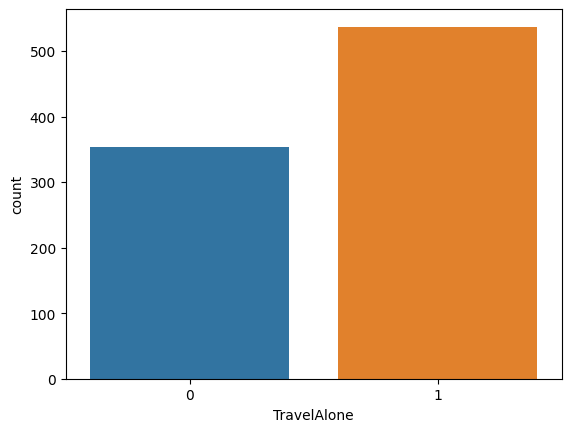

In [ ]:
sns.countplot(x="TravelAlone",data=dataset)
dataset['TravelAlone'].value_counts()

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


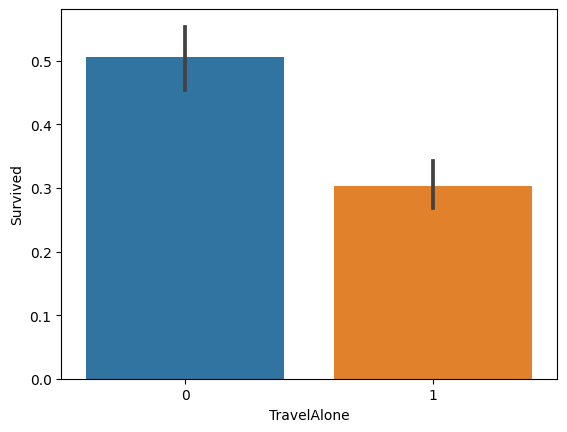

In [ ]:
sns.barplot(x="TravelAlone",y='Survived',data=dataset)
dataset.groupby('TravelAlone',as_index=False).Survived.mean()

The Median age of passengers is: 28


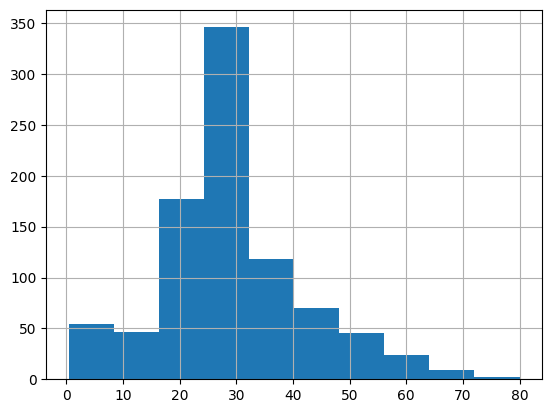

In [ ]:
dataset.Age.hist()
print("The Median age of passengers is:",int(dataset.Age.median()))

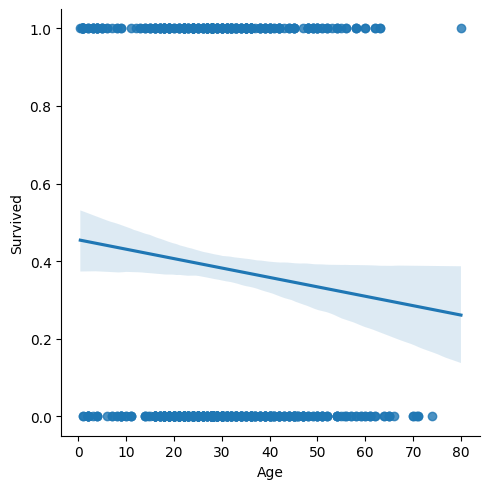

In [ ]:
sns.lmplot(x="Age",y='Survived',data=dataset)

0    549
1    342
Name: Survived, dtype: int64

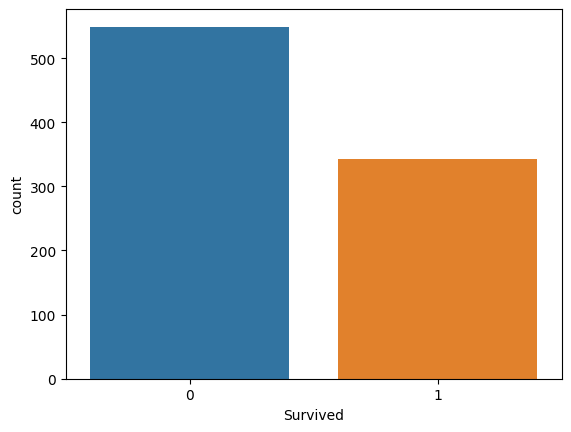

In [ ]:
sns.countplot (x= 'Survived', data=dataset)
dataset ['Survived'].value_counts()

In [ ]:
dataset.corr()

<ipython-input-40-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Survived,Pclass,Age,Fare,TravelAlone
Survived,1.000000,-0.338481,-0.064910,0.257307,-0.203367
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.135207
Age,-0.064910,-0.339898,1.000000,0.096688,0.171647
Fare,0.257307,-0.549500,0.096688,1.000000,-0.271832
TravelAlone,-0.203367,0.135207,0.171647,-0.271832,1.000000


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing. LabelEncoder()
dataset [ 'Sex']= label_encoder.fit_transform (dataset ['Sex'])
dataset ['Embarked']=label_encoder.fit_transform(dataset ['Embarked'])
x = dataset.drop('Survived', 1)
y = dataset.Survived
print("Features (X): \n",x)
print("Target (y): \n",y)

Features (X): 
      Pclass  Sex   Age     Fare  Embarked  TravelAlone
0         3    1  22.0   7.2500         2            0
1         1    0  38.0  71.2833         0            0
2         3    0  26.0   7.9250         2            1
3         1    0  35.0  53.1000         2            0
4         3    1  35.0   8.0500         2            1
..      ...  ...   ...      ...       ...          ...
886       2    1  27.0  13.0000         2            1
887       1    0  19.0  30.0000         2            1
888       3    0  28.0  23.4500         2            0
889       1    1  26.0  30.0000         0            1
890       3    1  32.0   7.7500         1            1

[891 rows x 6 columns]
Target (y): 
 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<ipython-input-41-c4e33be5ff89>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = dataset.drop('Survived', 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred=lr_model.predict(x_test)
y_pred


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1])

In [ ]:
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})

diff.head()

,Actual value,Predicted value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.66      0.72        79

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



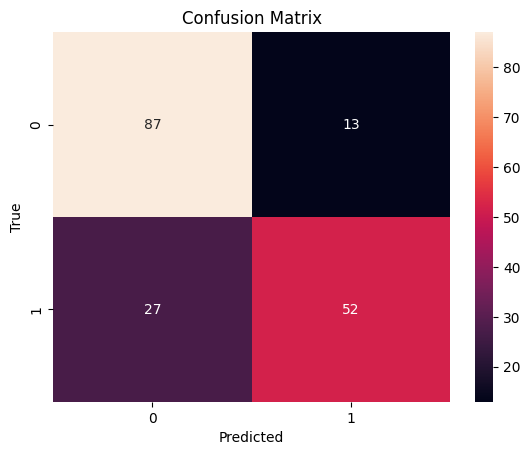

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix (y_test, y_pred)
sns.heatmap (matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print (classification_report(y_test, y_pred))